# Desafio Alura Store – Análise das Lojas

## Contexto para Desenvolvimento do Projeto

O Senhor João é dono de uma rede de lojas chamada **Alura Store** e deseja vender **uma das 4 lojas** para investir em um novo empreendimento.

O objetivo deste projeto é, a partir dos dados históricos de vendas, responder:

> **“Qual loja da Alura Store o João deve vender?”**

Para isso, vamos analisar:
- **Faturamento**
- **Categorias mais vendidas**
- **Produtos mais vendidos**
- **Avaliação dos clientes**
- **Frete médio**

No final, apresentamos uma **recomendação**, baseada nos dados.

---

### Importação dos dados



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"



In [15]:
# Unindo os dados em um DataFrame
dados = [url, url2, url3, url4]
lojas = [f"Loja {i}" for i in range(1, 5)]

lista_df = []

for dado, nome_loja in zip(dados, lojas):
    df = pd.read_csv(dado)
    df['Loja'] = nome_loja
    lista_df.append(df)

df = pd.concat(lista_df, ignore_index=True)
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


### Tratamento dos dados

In [16]:
# Verificando os dados para tratamento

print(df['Loja'].value_counts())
print(df['Loja'].unique())
df.shape

Loja
Loja 1    2359
Loja 2    2359
Loja 3    2359
Loja 4    2358
Name: count, dtype: int64
['Loja 1' 'Loja 2' 'Loja 3' 'Loja 4']


(9435, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [18]:
# Dados para tratamento:
# Nome das colunas - limpar espaços, passar para minúsculo e trocar espaço por "_".

# 1. Obter os nomes das colunas
colunas_antigas = df.columns

# 2. Criar uma lista para os novos nomes
novas_colunas = []

# 3. Iterar e aplicar as transformações
for col in colunas_antigas:
    # Remover espaços no início/fim, passar para minúsculo, e trocar espaços internos por '_'
    novo_nome = col.strip().lower().replace(' ', '_')
    novas_colunas.append(novo_nome)

# 4. Atribuir os novos nomes ao DataFrame
df.columns = novas_colunas

print("\n--- Nomes das Colunas Padronizados ---")
print(df.columns.tolist())



--- Nomes das Colunas Padronizados ---
['produto', 'categoria_do_produto', 'preço', 'frete', 'data_da_compra', 'vendedor', 'local_da_compra', 'avaliação_da_compra', 'tipo_de_pagamento', 'quantidade_de_parcelas', 'lat', 'lon', 'loja']


In [19]:
# Mapeamento para remover caracteres especiais
mapa_caracteres = {
    'á': 'a', 'à': 'a', 'ã': 'a', 'â': 'a',
    'é': 'e', 'ê': 'e',
    'í': 'i',
    'ó': 'o', 'õ': 'o', 'ô': 'o',
    'ú': 'u',
    'ç': 'c',
   }

def limpar_nome_coluna_normalizada(nome):
    # 1. Limpeza básica: strip, lower, replace spaces
    nome_limpo = nome.strip().lower().replace(' ', '_')

    # 2. Substituição de caracteres especiais
    for char, replacement in mapa_caracteres.items():
        nome_limpo = nome_limpo.replace(char, replacement)

    return nome_limpo

# 3. Nova função a todas as colunas
df.columns = [limpar_nome_coluna_normalizada(col) for col in df.columns]

print("--- Nomes das Colunas Padronizados e Normalizados ---")
print(df.columns.tolist())

--- Nomes das Colunas Padronizados e Normalizados ---
['produto', 'categoria_do_produto', 'preco', 'frete', 'data_da_compra', 'vendedor', 'local_da_compra', 'avaliacao_da_compra', 'tipo_de_pagamento', 'quantidade_de_parcelas', 'lat', 'lon', 'loja']


In [20]:
# Dados para tratamento:
# Converter data_da_compra para datetime.
# Verificar o tipo de dado atual da coluna 'data_da_compra'
print("--- Tipo de dado original da coluna 'data_da_compra' ---")
print(df['data_da_compra'].dtype)

# 1. Converter a coluna para o tipo datetime
# errors='coerce' é importante: se o Pandas encontrar uma data inválida,
# ele a substituirá por NaT (Not a Time), prevenindo que o código pare.
df['data_da_compra'] = pd.to_datetime(df['data_da_compra'], errors='coerce')

# 2. Verificar o novo tipo de dado
print("\n--- Novo tipo de dado (datetime) ---")
print(df['data_da_compra'].dtype)

# 3. Mostrar as primeiras linhas para confirmar a conversão
print("\n--- Primeiras Linhas da Coluna Convertida ---")
print(df[['data_da_compra']].head())

--- Tipo de dado original da coluna 'data_da_compra' ---
object

--- Novo tipo de dado (datetime) ---
datetime64[ns]

--- Primeiras Linhas da Coluna Convertida ---
  data_da_compra
0     2021-01-16
1     2022-05-18
2     2021-03-15
3     2022-05-03
4     2020-11-07


/tmp/ipython-input-1395341092.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_da_compra'] = pd.to_datetime(df['data_da_compra'], errors='coerce')


In [21]:
df.isnull().sum()

,0
produto,0
categoria_do_produto,0
preco,0
frete,0
data_da_compra,0
vendedor,0
local_da_compra,0
avaliacao_da_compra,0
tipo_de_pagamento,0
quantidade_de_parcelas,0


#1. Análise do faturamento



In [22]:
# O Faturamento Bruto é a soma do Preço + Frete
df['faturamento_bruto'] = df['preco'] + df['frete']

In [23]:
df[['loja' ,'preco', 'frete', 'faturamento_bruto']].head ()


,loja,preco,frete,faturamento_bruto
0,Loja 1,219.08,9.249790,228.329790
1,Loja 1,256.35,11.234305,267.584305
2,Loja 1,279.51,21.262681,300.772681
3,Loja 1,1009.99,54.667344,1064.657344
4,Loja 1,446.99,26.964689,473.954689


In [24]:
# 1. Agrupar os dados e calcular o faturamento.
faturamento_por_loja = df.groupby('loja')['faturamento_bruto'].sum().reset_index()
faturamento_por_loja.columns = ['Loja', 'Faturamento Total']
faturamento_por_loja = faturamento_por_loja.sort_values(
    by='Faturamento Total', ascending=False
)

# 2. Calcular o Faturamento Total Geral
faturamento_total_geral = faturamento_por_loja['Faturamento Total'].sum()

# 3. Criar o DataFrame da linha do Total Geral
df_total = pd.DataFrame({
    'Loja': ['Total Geral'],
    'Faturamento Total': [faturamento_total_geral]
})

# 4. Concatenar o DataFrame das lojas com o DataFrame do Total Geral
faturamento_final = pd.concat([faturamento_por_loja, df_total], ignore_index=True)

# 5. Formatar a coluna 'Faturamento Total' para moeda.
faturamento_final['Faturamento Formatado'] = faturamento_final['Faturamento Total'].map(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
)

# 6. Exibir o resultado final
print("--- Tabela Consolidada de Faturamento por Loja e Total Geral ---")
print(faturamento_final[['Loja', 'Faturamento Formatado']])

--- Tabela Consolidada de Faturamento por Loja e Total Geral ---
          Loja Faturamento Formatado
0       Loja 1       R$ 1.616.347,09
1       Loja 2       R$ 1.567.773,22
2       Loja 3       R$ 1.542.047,69
3       Loja 4       R$ 1.458.253,46
4  Total Geral       R$ 6.184.421,45


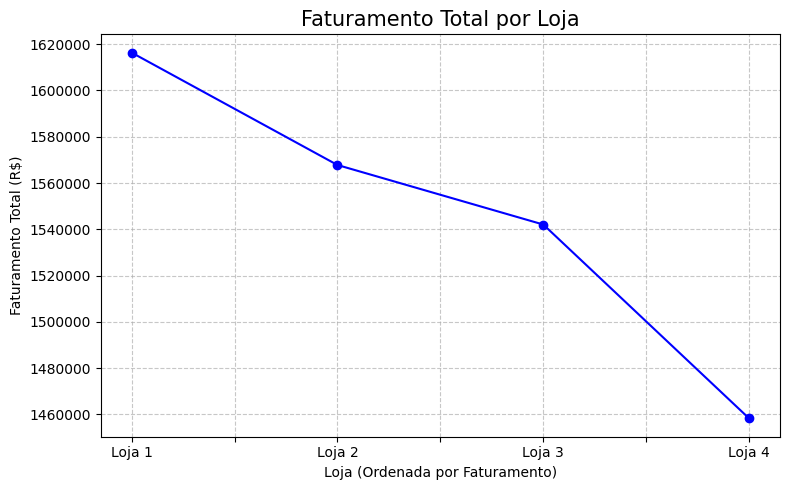

In [38]:
import matplotlib.pyplot as plt

# 1. Agrupar, somar e ordenar (cria uma Series)
faturamento_loja = df.groupby('loja')['faturamento_bruto'].sum().sort_values(ascending=False)

# 2. Geração do Gráfico (usando .plot() e alterando para "line")
plt.figure(figsize=(8, 5))

faturamento_loja.plot(
    kind="line", # ALTERADO AQUI PARA GRÁFICO DE LINHAS
    marker='o',  # Adiciona marcadores para visualizar cada loja (ponto de dados)
    color='blue', # Cor única para a linha
    rot=0
)

plt.title("Faturamento Total por Loja", fontsize=15)
plt.xlabel("Loja (Ordenada por Faturamento)") # Rótulo ajustado para refletir a ordenação
plt.ylabel("Faturamento Total (R$)")
plt.grid(axis='both', linestyle='--', alpha=0.7) # Grade em ambos os eixos
plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

In [26]:
# 1.Agrupar o DataFrame pela coluna categoria do produto e somar o faturamento_bruto.

vendas_por_categoria = df.groupby('categoria_do_produto')['faturamento_bruto'].sum().reset_index()


In [27]:
vendas_por_categoria.columns = ['Categoria do Produto' ,'Faturamento Total']
vendas_por_categoria

vendas_por_categoria['Faturamento Formatado'] = vendas_por_categoria['Faturamento Total'].map(
    # Função de formatação: f-string para 2 casas decimais e separador de milhar.
    lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

print("--- Faturamento Total por Categoria ---")
print(vendas_por_categoria[['Categoria do Produto', 'Faturamento Formatado']])

--- Faturamento Total por Categoria ---
    Categoria do Produto Faturamento Formatado
0             brinquedos         R$ 103.502,36
1       eletrodomesticos       R$ 1.860.198,66
2            eletronicos       R$ 2.332.048,08
3        esporte e lazer         R$ 200.891,94
4  instrumentos musicais         R$ 489.701,48
5                 livros          R$ 53.007,43
6                 moveis       R$ 1.064.149,77
7  utilidades domesticas          R$ 80.921,72


In [28]:
# 1. Agrupar por 'loja' E 'categoria_do_produto' e somar o 'faturamento_bruto'
vendas_detalhadas = df.groupby(
    ['loja', 'categoria_do_produto']
)['faturamento_bruto'].sum().reset_index()

# 2. Renomear as colunas
vendas_detalhadas.columns = ['Loja', 'Categoria', 'Faturamento Total']

# 3. Ordenar para melhor visualização (por Loja, e depois por Faturamento)
vendas_detalhadas = vendas_detalhadas.sort_values(
    by=['Loja', 'Faturamento Total'], ascending=[True, False]
)

print("--- Faturamento Detalhado por Loja e Categoria ---")
print(vendas_detalhadas.head(20))

--- Faturamento Detalhado por Loja e Categoria ---
      Loja              Categoria  Faturamento Total
2   Loja 1            eletronicos      603278.238660
1   Loja 1       eletrodomesticos      510678.320571
6   Loja 1                 moveis      263505.317336
4   Loja 1  instrumentos musicais      128243.495861
3   Loja 1        esporte e lazer       55216.657567
0   Loja 1             brinquedos       25299.265959
7   Loja 1  utilidades domesticas       17789.381598
5   Loja 1                 livros       12336.410244
10  Loja 2            eletronicos      576858.274761
9   Loja 2       eletrodomesticos      489499.129045
14  Loja 2                 moveis      247817.049515
12  Loja 2  instrumentos musicais      147397.090812
11  Loja 2        esporte e lazer       48828.896941
8   Loja 2             brinquedos       22445.828832
15  Loja 2  utilidades domesticas       20731.111659
13  Loja 2                 livros       14195.836448
18  Loja 3            eletronicos      576840.38

In [29]:
# Calcular o Faturamento Total Geral
faturamento_total_geral = vendas_detalhadas['Faturamento Total'].sum()

# Calcular o Faturamento Total por Loja (usado para criar a linha de total de cada loja)
total_por_loja = vendas_detalhadas.groupby('Loja')['Faturamento Total'].sum().reset_index()
total_por_loja['Categoria'] = 'TOTAL DA LOJA'

# Renomear e reordenar as colunas para concatenar
total_por_loja = total_por_loja[['Loja', 'Categoria', 'Faturamento Total']]

# Concatenar os totais de loja com os detalhes (Adiciona as linhas 'TOTAL DA LOJA')
df_consolidado = pd.concat([vendas_detalhadas, total_por_loja], ignore_index=True)
df_consolidado = df_consolidado.sort_values(by=['Loja', 'Faturamento Total'], ascending=[True, False])

# Criar a linha do Total Geral
df_total_geral = pd.DataFrame({
    'Loja': ['TOTAL GERAL'],
    'Categoria': ['TODAS AS CATEGORIAS'],
    'Faturamento Total': [faturamento_total_geral]
})

# Concatenar com o Total Geral
df_consolidado = pd.concat([df_consolidado, df_total_geral], ignore_index=True)

In [30]:
print("\n--- Tabela Consolidada de Faturamento (Detalhe e Totais) ---")

# Formatação de moeda
df_consolidado_formatado = df_consolidado.style.format({
    'Faturamento Total': lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
})

# Destacar as linhas de total
df_consolidado_formatado = df_consolidado_formatado.apply(
    lambda x: ['font-weight: bold; background-color: #5F9EA0' if 'TOTAL' in str(v) else '' for v in x],
    axis=1
)

# Resultado
display(df_consolidado_formatado)


--- Tabela Consolidada de Faturamento (Detalhe e Totais) ---


,Loja,Categoria,Faturamento Total
0,Loja 1,TOTAL DA LOJA,"R$ 1.616.347,09"
1,Loja 1,eletronicos,"R$ 603.278,24"
2,Loja 1,eletrodomesticos,"R$ 510.678,32"
3,Loja 1,moveis,"R$ 263.505,32"
4,Loja 1,instrumentos musicais,"R$ 128.243,50"
5,Loja 1,esporte e lazer,"R$ 55.216,66"
6,Loja 1,brinquedos,"R$ 25.299,27"
7,Loja 1,utilidades domesticas,"R$ 17.789,38"
8,Loja 1,livros,"R$ 12.336,41"
9,Loja 2,TOTAL DA LOJA,"R$ 1.567.773,22"


# 3. Média de Avaliação das Lojas


In [31]:
# 1. Cálculo (Reutilizando o resultado da etapa anterior)
# Garantindo que a coluna 'avaliacao_da_compra' seja usada
avaliacao_por_loja = df.groupby('loja')['avaliacao_da_compra'].mean().reset_index()
avaliacao_por_loja.columns = ['Loja', 'Média de Avaliação']

# 2. Ordenação por Loja (Ordem Numérica Ascendente)
# O Pandas ordena 'Loja 1', 'Loja 2', etc., alfabeticamente, o que atende ao requisito numérico.
avaliacao_por_loja = avaliacao_por_loja.sort_values(
    by='Loja', ascending=True
)

In [32]:
print("--- Média de Avaliação dos Clientes por Loja ---")

# 3. Formatação da Saída (Uma Casa Decimal)
# Usamos '{:.1f}' para garantir que a coluna 'Média de Avaliação' tenha apenas uma casa decimal.
avaliacao_formatada = avaliacao_por_loja.style.format({
    'Média de Avaliação': '{:.2f}'
})

display(avaliacao_formatada)

--- Média de Avaliação dos Clientes por Loja ---


,Loja,Média de Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


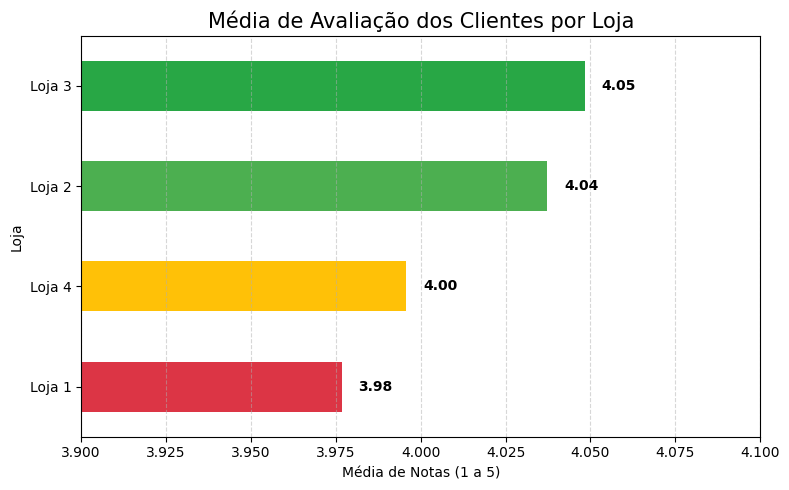

In [33]:
import matplotlib.pyplot as plt

# 1. Agrupar, calcular a média e ordenar (cria uma Series)
# Ordenamos para que a Loja com a MELHOR avaliação (4.05) fique no topo do gráfico horizontal
avaliacao_loja = df.groupby('loja')['avaliacao_da_compra'].mean().sort_values(ascending=True)

# 2. Geração do Gráfico (usando .plot(kind='barh'))
plt.figure(figsize=(8, 5))

# Plotamos o gráfico de barras horizontais
bars = avaliacao_loja.plot(
    kind="barh",
    # Cores indicando desempenho: Melhor (topo) é verde, Pior (base) é vermelho
    color=['#dc3545', '#ffc107', '#4CAF50', '#28a745'],
    legend=False # Não precisamos de legenda, o eixo Y já tem os rótulos
)

plt.title("Média de Avaliação dos Clientes por Loja", fontsize=15)
plt.ylabel("Loja")
plt.xlabel("Média de Notas (1 a 5)")
# Ajusta o limite inferior para focar na variação (as notas estão entre 3.98 e 4.05)
plt.xlim(3.9, 4.1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adicionar os valores exatos no final de cada barra
ax = plt.gca()
for i, p in enumerate(ax.patches):
    # Formata o valor com duas casas decimais
    valor_rotulo = f'{p.get_width():.2f}'

    plt.text(
        p.get_width() + 0.005, # Posição X (um pouco à frente da barra)
        p.get_y() + p.get_height() / 2,
        valor_rotulo,
        ha='left', va='center', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [34]:
# 1. Agrupar por 'produto' e somar o 'faturamento_bruto'

vendas_por_produto = df.groupby('produto')['faturamento_bruto'].sum().reset_index()
vendas_por_produto.columns = ['Produto', 'Faturamento Total']

mais_vendidos = vendas_por_produto.sort_values(by='Faturamento Total', ascending=False).head(10)
menos_vendidos = vendas_por_produto[vendas_por_produto['Faturamento Total'] > 0].sort_values(by='Faturamento Total', ascending=True).head(10)

In [35]:
print("--- Os 10 Produtos Mais Vendidos ---")
# Usamos a formatação visual (style.format) para R$
top_10_formatado = mais_vendidos.style.format({
    'Faturamento Total': lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
})
display(top_10_formatado)

print("\n--- Os 10 Produtos Menos vendidos ---")
piores_10_formatado = menos_vendidos.style.format({
    'Faturamento Total': lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
})
display(piores_10_formatado)

--- Os 10 Produtos Mais Vendidos ---


,Produto,Faturamento Total
47,TV Led UHD 4K,"R$ 607.367,22"
12,Celular Plus X42,"R$ 563.260,88"
23,Geladeira,"R$ 540.523,01"
44,Smart TV,"R$ 407.550,16"
34,Lavadora de roupas,"R$ 340.477,39"
33,Lava louças,"R$ 337.793,40"
48,Tablet ABXY,"R$ 307.628,07"
43,Secadora de roupas,"R$ 295.243,32"
11,Celular ABXY,"R$ 221.763,77"
1,Bateria,"R$ 207.574,06"



--- Os 10 Produtos Menos vendidos ---


,Produto,Faturamento Total
16,Cubo mágico 8x8,"R$ 3.922,00"
15,Corda de pular,"R$ 4.443,28"
19,Dinossauro Rex,"R$ 4.493,64"
50,Xadrez de madeira,"R$ 7.232,92"
29,Jogo de copos,"R$ 7.927,91"
18,Dashboards com Power BI,"R$ 9.063,51"
3,Blocos de montar,"R$ 9.509,11"
14,Copo térmico,"R$ 11.930,39"
20,Faqueiro,"R$ 11.972,79"
6,Boneca bebê,"R$ 12.005,20"


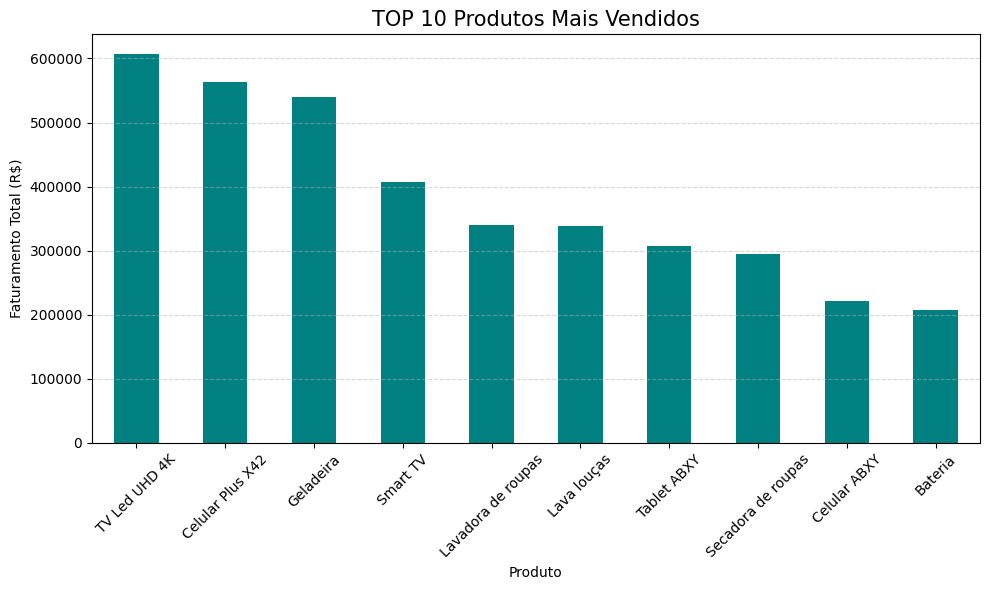

In [36]:
import matplotlib.pyplot as plt

# 1. Agrupar, somar, ordenar e pegar o Top 10
faturamento_produto = df.groupby('produto')['faturamento_bruto'].sum().sort_values(ascending=False).head(10)

# 2. Geração do Gráfico (Usando .plot() do Pandas)
plt.figure(figsize=(10, 6))

faturamento_produto.plot(
    kind="bar",
    color='teal',
    rot=45 # Inclinamos os rótulos dos produtos
)

plt.title("TOP 10 Produtos Mais Vendidos", fontsize=15)
plt.xlabel("Produto")
plt.ylabel("Faturamento Total (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y') # Evita a notação científica

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

In [37]:
# 1. Agrupar os dados pela coluna 'loja'
# 2. Aplicar a função de média (.mean()) à coluna 'frete'

frete_medio_por_loja = df.groupby('loja')['frete'].mean().reset_index()
frete_medio_por_loja = frete_medio_por_loja.round(2)
frete_medio_por_loja

,loja,frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


# 6. Comparativo entre Lojas

In [39]:
# 1. Calcular o Frete Médio por Loja
frete_medio = df.groupby('loja')['frete'].mean().reset_index()
frete_medio.columns = ['Loja', 'Frete Médio']

# 2. Calcular a Média de Avaliação por Loja
avaliacao_media = df.groupby('loja')['avaliacao_da_compra'].mean().reset_index()
avaliacao_media.columns = ['Loja', 'Média de Avaliação']

# 3. Calcular o Faturamento Total por Loja
faturamento_total = df.groupby('loja')['faturamento_bruto'].sum().reset_index()
faturamento_total.columns = ['Loja', 'Faturamento Total']

# 4. Unir os três DataFrames em um único comparativo
df_comparativo = pd.merge(frete_medio, avaliacao_media, on='Loja')
df_comparativo = pd.merge(df_comparativo, faturamento_total, on='Loja')

# 5. Ordenar o resultado pelo Faturamento Total
df_comparativo = df_comparativo.sort_values(
    by='Faturamento Total', ascending=False
)

print("--- Comparativo Consolidado entre as 4 Lojas ---")

# 6. Formatar o DataFrame final para melhor visualização
# Formatar Frete e Faturamento como moeda e Avaliação com duas casas
df_comparativo_formatado = df_comparativo.style.format({
    'Frete Médio': lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
    'Média de Avaliação': '{:.2f}',
    'Faturamento Total': lambda x: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
})

display(df_comparativo_formatado)

--- Comparativo Consolidado entre as 4 Lojas ---


,Loja,Frete Médio,Média de Avaliação,Faturamento Total
0,Loja 1,"R$ 34,69",3.98,R$ 1.616.347
1,Loja 2,"R$ 33,62",4.04,R$ 1.567.773
2,Loja 3,"R$ 33,07",4.05,R$ 1.542.048
3,Loja 4,"R$ 31,28",4.00,R$ 1.458.253


#Recomendação Final: Vender a Loja 4
A Loja 4 apresenta o pior desempenho nas métricas mais críticas:

* Menor Receita: A Loja 4 gera o menor volume de faturamento total, indicando a menor contribuição para a receita consolidada da Alura Store.

* Satisfação: Possui uma das menores médias de avaliação, sugerindo problemas na experiência do cliente ou qualidade de entrega/produto.

Vender a Loja 4 permite ao Sr. João eliminar o ativo de menor performance em termos de receita e, provavelmente, o de maior risco em termos de satisfação. O capital obtido da venda pode ser investido no novo empreendimento ou nas outras três lojas mais eficientes.

# Extra!  Análise de Desempenho Geográfico

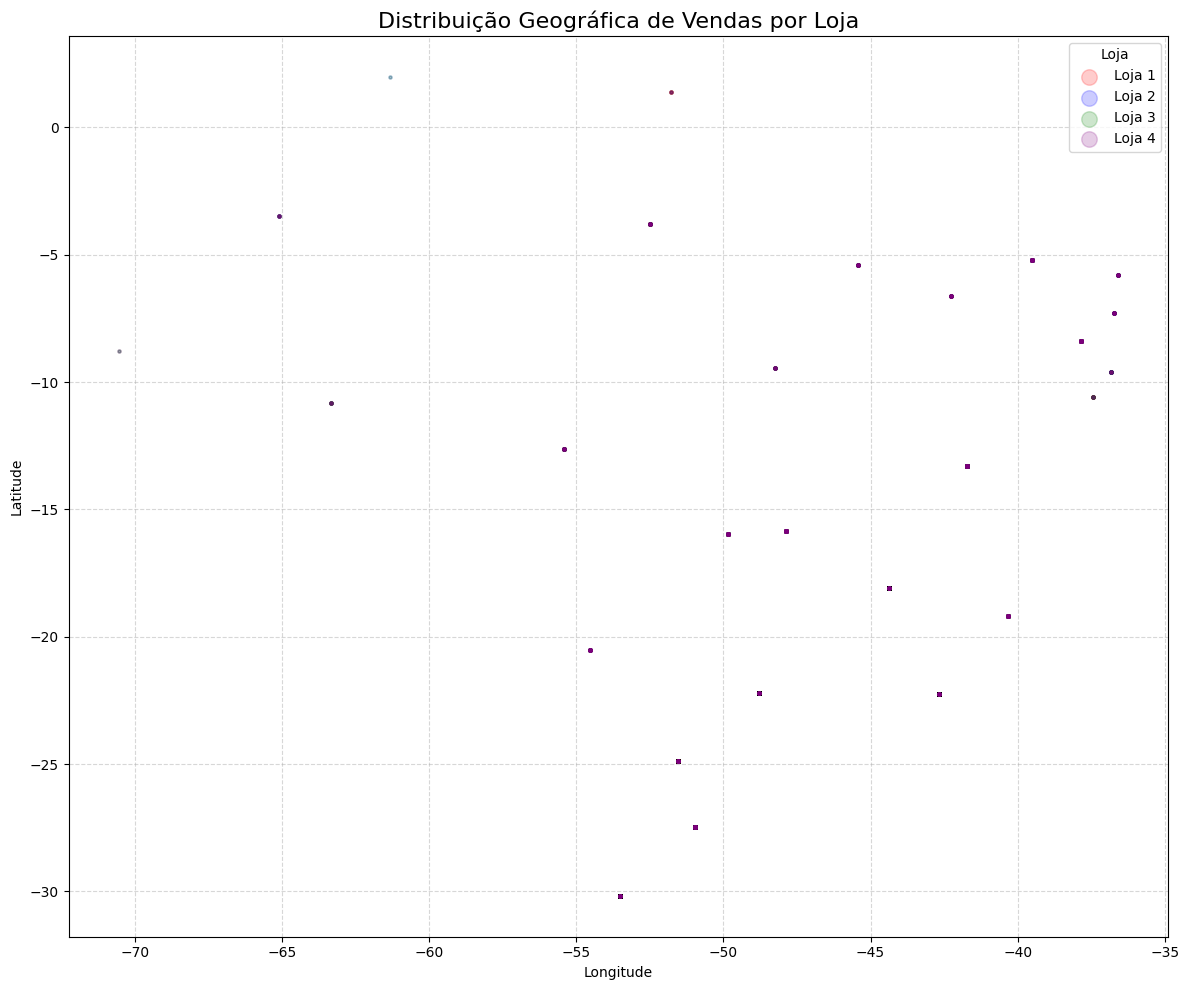

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn para obter o mapa de cores

plt.figure(figsize=(12, 10))

# Criamos um mapa de cores (palette) para atribuir uma cor a cada loja
cores_lojas = {'Loja 1': 'red', 'Loja 2': 'blue', 'Loja 3': 'green', 'Loja 4': 'purple'}

# Usamos um loop para plotar as vendas de cada loja separadamente
for loja, cor in cores_lojas.items():
    df_loja = df[df['loja'] == loja]

    plt.scatter(
        df_loja['lon'],
        df_loja['lat'],
        alpha=0.2, # Transparência para ver a densidade
        s=5,
        color=cor,
        label=loja
    )

plt.title('Distribuição Geográfica de Vendas por Loja', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Loja', loc='best', markerscale=5) # Adiciona legenda para as lojas

plt.tight_layout()
plt.show()